## Contours in OpenCV

Install OpenCV via pip. Note that we need opencv-contrib-python for some of the future exercises (though it's enough to install just `opencv-python` for this one).

In [1]:
!pip install opencv-contrib-python

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io
from skimage.io import imread

Tasks: 
0. Load contours_exercise.jpg
1. Estimate edges
2. Count the number of items (= the number of external contours)
3. Count the number of green items
4. Count the number of rectangular items (including square ones)
5. Count the total number of holes

In [17]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

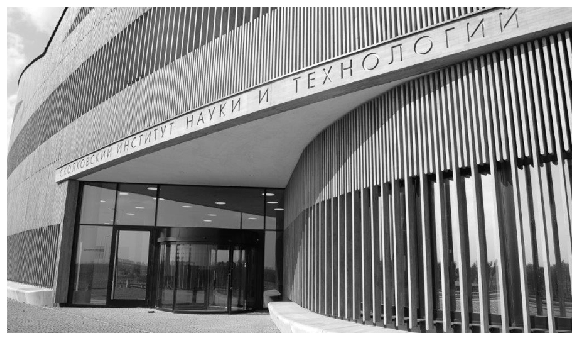

In [18]:
img_orig = io.imread('skoltech_0.jpg')
img = cv2.imread('skoltech_0.jpg', 0)

plot_img(img)

In [19]:
def convolve(image, kernel):
    assert image.ndim == kernel.ndim == 2
    
    kernel = np.flip(kernel, axis=range(kernel.ndim))
    shape = np.array(image.shape) - kernel.shape + 1
    result = np.empty(shape, dtype=float) # we'll keep things simple and always return float
    h, w = kernel.shape
        
    for i, j in np.ndindex(*shape):
        result[i, j] = (image[i:i + h, j:j + w] * kernel).sum()

    return result

    
def convolve_same(image, kernel):
    # pad image before convolution to obtain same resulting shape
    delta = np.array(kernel.shape) - 1
    # left and right padding
    left = delta // 2
    right = delta - left
    padding = np.array([left, right]).T

    image = np.pad(image, padding, mode='constant') 
    return convolve(image, kernel)

In [20]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='float32')

In [21]:
import scipy.stats as st


def get_gk(size=17, nsig=3):
    """Returns a 2D Gaussian kernel"""
    x = np.linspace(-nsig, nsig, size + 1)
    kernel = np.diff(st.norm.cdf(x))
    kernel = np.outer(kernel, kernel)
    kernel /= kernel.sum()
    return kernel

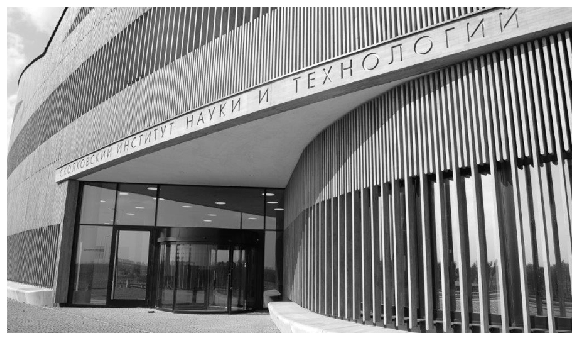

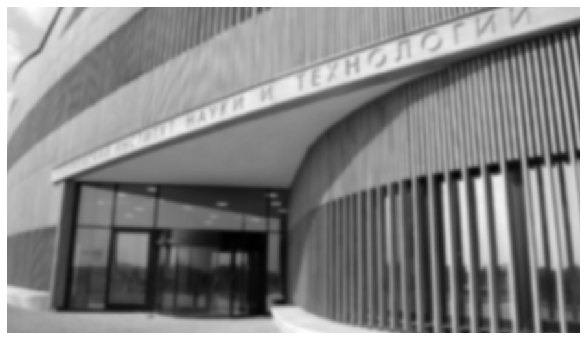

In [22]:
img_smoothed = convolve(np.float32(img), get_gk())

plot_img(img)
plot_img(img_smoothed)

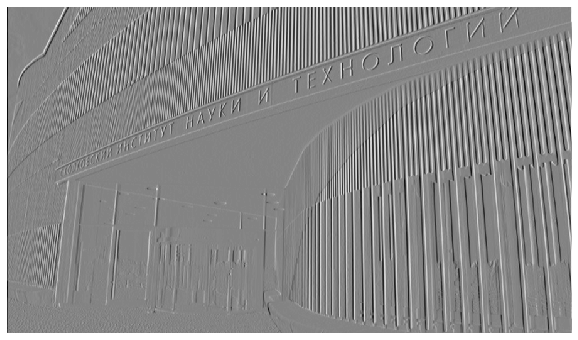

In [26]:
grad_x = convolve_same(img, kernel_x) 
plot_img(grad_x)

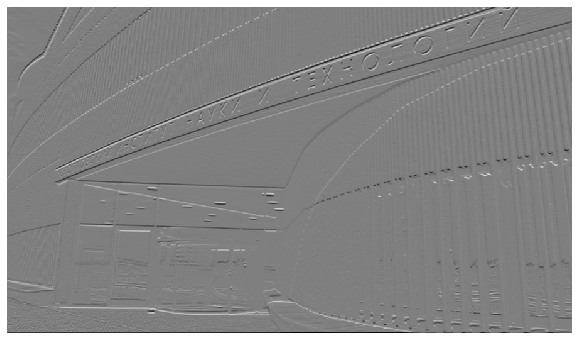

In [27]:
grad_y = convolve_same(img, kernel_y) 
plot_img(grad_y)

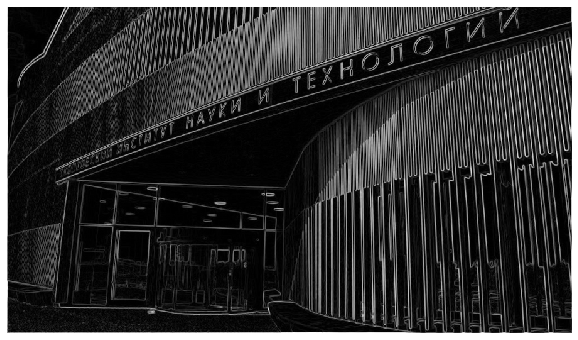

In [28]:
norm = np.hypot(grad_y, grad_x)
plot_img(norm)

In [33]:
import scipy.stats as st


def get_gk(size=17, nsig=3):
    """Returns a 2D Gaussian kernel"""
    x = np.linspace(-nsig, nsig, size + 1)
    kernel = np.diff(st.norm.cdf(x))
    kernel = np.outer(kernel, kernel)
    kernel /= kernel.sum()
    return kernel

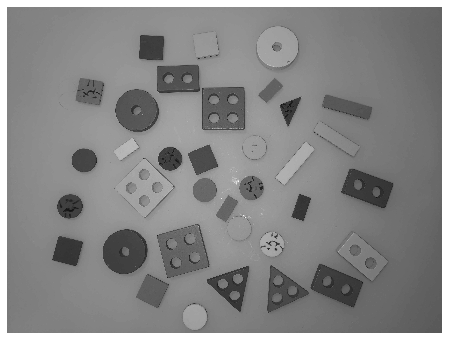

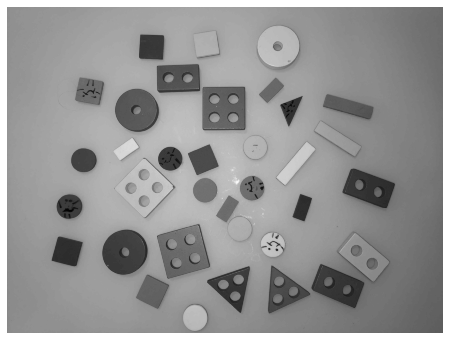

In [34]:
img_smoothed = convolve(np.float32(img), get_gk())

plot_img(img)
plot_img(img_smoothed)

In [ ]:
img_orig = io.imread('contours_exercise.jpg')
img = cv2.imread('contours_exercise.jpg', 0)

plot_img(img)

In [ ]:
grad_x = convolve_same(img_smoothed, kernel_x) 
plot_img(grad_x)